In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from utils import train_test_split, standardize, polynomialFeatures
from utils import MSE_degree_plot
from model import PolynomialRegression
from utils import plot_RMSE_loglam

In [2]:
df = pd.read_csv('FoDS-A1.csv')
# df = df.sample(frac=1, random_state=42)
df.head()

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20


In [3]:
X = df[['Strength', 'Temperature']].to_numpy()
y = df['Pressure'].to_numpy()
y = y.reshape(-1, 1)
X.shape, y.shape

((1650, 2), (1650, 1))

In [4]:
BGD_MSE_train = []
SGD_MSE_train = []
BGD_MSE_test = []
SGD_MSE_test = []
model_wts = []

## Degree: 0

Degree : 0
Cost after iteration 50 : 46.91717962319684
Cost after iteration 100 : 20.910611078854593
Cost after iteration 150 : 11.39136590608625
Cost after iteration 200 : 7.907014308343979
Cost after iteration 250 : 6.631628935203256
Cost after iteration 300 : 6.164796641046927
Cost after iteration 350 : 5.993920923434933
Cost after iteration 400 : 5.931374884450673
Cost after iteration 450 : 5.908481011363896
Cost after iteration 500 : 5.900101113397131
Cost after iteration 550 : 5.897033799724725
Cost after iteration 600 : 5.895911063719795
Cost after iteration 650 : 5.895500106031278
Cost after iteration 700 : 5.895349682226385
Cost after iteration 750 : 5.8952946222488976
Cost after iteration 800 : 5.895274468516427
Cost after iteration 850 : 5.895267091598546
Cost after iteration 900 : 5.8952643914080225
Cost after iteration 950 : 5.895263403050963
Cost after iteration 1000 : 5.895263041280315


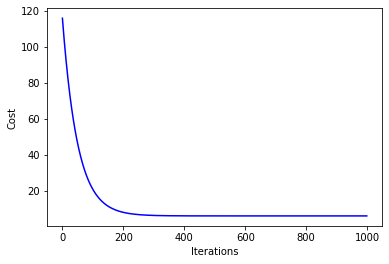

In [5]:
degree=0
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1000, GD='BatchGD')
model_wts.append(pr.W)
pr.train(X_train, y_train)

In [6]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.690253477661287


Cost after epoch 1: 30.089230925903284
Cost after epoch 2: 10.27113576488721
Cost after epoch 3: 6.184106687320864
Cost after epoch 4: 5.110684114495831
Cost after epoch 5: 4.793855718023945


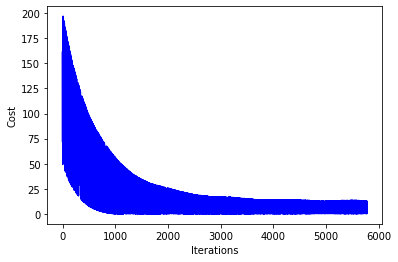

In [7]:
pr = PolynomialRegression(0, degree=0, learning_rate=0.001, epochs=5, GD='StochasticGD')
pr.train(X_train, y_train)

In [8]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.69895242105457


## Degree: 1

Degree : 1
Cost after iteration 50 : 46.04022067826685
Cost after iteration 100 : 19.483156099992264
Cost after iteration 150 : 9.518607254709712
Cost after iteration 200 : 5.6529150252103495
Cost after iteration 250 : 4.047491153629957
Cost after iteration 300 : 3.294481425440822
Cost after iteration 350 : 2.8753774739158144
Cost after iteration 400 : 2.5975073538159124
Cost after iteration 450 : 2.3878299597593653
Cost after iteration 500 : 2.2174238367815216
Cost after iteration 550 : 2.07380608264746
Cost after iteration 600 : 1.9507621733890725
Cost after iteration 650 : 1.8445900911541113
Cost after iteration 700 : 1.752696656787919
Cost after iteration 750 : 1.6730586685310638
Cost after iteration 800 : 1.6040039100355141
Cost after iteration 850 : 1.5441121237614917
Cost after iteration 900 : 1.492162396478579
Cost after iteration 950 : 1.4470997025331769
Cost after iteration 1000 : 1.4080103413686023
Cost after iteration 1050 : 1.374102263085082
Cost after iteration 1100 : 1.3

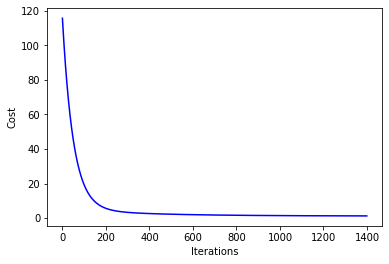

In [9]:
degree=1
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
model_wts.append(pr.W)
pr.train(X_train, y_train)

In [10]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2250967294851118


Cost after epoch 1: 44.196537934505095
Cost after epoch 2: 0.18403703361861734


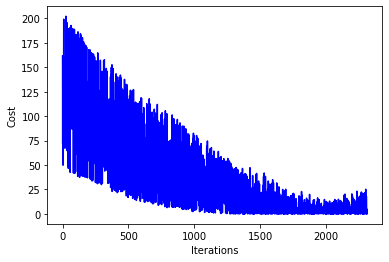

In [11]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.0005, epochs=2, GD='StochasticGD')
pr.train(X_train, y_train)

In [12]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 6.7420139514667


## Degree: 2

Degree : 2
Cost after iteration 50 : 45.44029536546442
Cost after iteration 100 : 18.62229875593276
Cost after iteration 150 : 8.500167739086335
Cost after iteration 200 : 4.5660906893985445
Cost after iteration 250 : 2.9551705715204206
Cost after iteration 300 : 2.2379544592886886
Cost after iteration 350 : 1.8801917305847835
Cost after iteration 400 : 1.6781085214309799
Cost after iteration 450 : 1.5509869019645555
Cost after iteration 500 : 1.4647104177266308
Cost after iteration 550 : 1.4033827874627172
Cost after iteration 600 : 1.3586437699892338
Cost after iteration 650 : 1.3255379604973925
Cost after iteration 700 : 1.3008382407021628
Cost after iteration 750 : 1.2823095215219416
Cost after iteration 800 : 1.2683478398091281
Cost after iteration 850 : 1.2577800944130804
Cost after iteration 900 : 1.249739916609385
Cost after iteration 950 : 1.2435843345865119
Cost after iteration 1000 : 1.2388350087903615
Cost after iteration 1050 : 1.235135648499957
Cost after iteration 1100 :

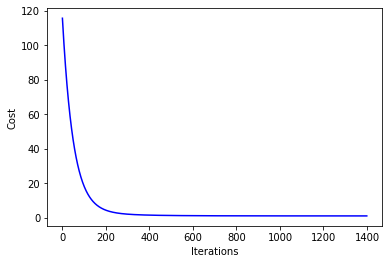

In [13]:
degree=2
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [14]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2425561719215246


Cost after epoch 1: 0.0009874128077126739


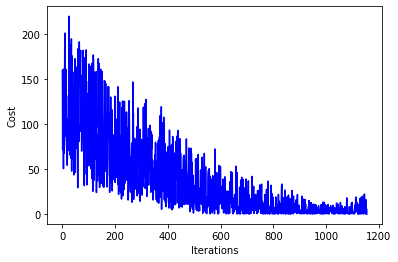

In [15]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [16]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.925627204449026


## Degree: 3

Degree : 3
Cost after iteration 50 : 44.974430220803846
Cost after iteration 100 : 18.01725953319262
Cost after iteration 150 : 7.90312059065093
Cost after iteration 200 : 4.0452224159876415
Cost after iteration 250 : 2.5341017458472006
Cost after iteration 300 : 1.9173837678086059
Cost after iteration 350 : 1.650148380115332
Cost after iteration 400 : 1.5246593569610054
Cost after iteration 450 : 1.459726836642222
Cost after iteration 500 : 1.422425491043176
Cost after iteration 550 : 1.3987058785601298
Cost after iteration 600 : 1.3821801265319915
Cost after iteration 650 : 1.3697328127625998
Cost after iteration 700 : 1.3597375692209528
Cost after iteration 750 : 1.3512943115980556
Cost after iteration 800 : 1.3438816272638276
Cost after iteration 850 : 1.337186983505268
Cost after iteration 900 : 1.3310181070322775
Cost after iteration 950 : 1.3252540780835598
Cost after iteration 1000 : 1.319817183143426
Cost after iteration 1050 : 1.3146562358216787
Cost after iteration 1100 : 1.

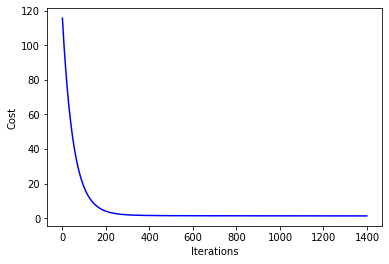

In [17]:
degree= 3
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [18]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.291511716209471


Cost after epoch 1: 0.2244443878789955


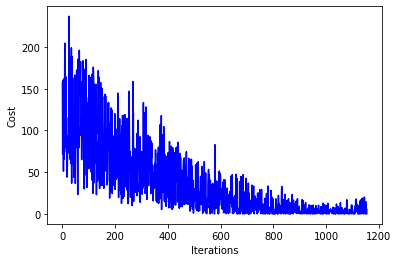

In [19]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [20]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.389498826628728


## Degree: 4

Degree : 4
Cost after iteration 50 : 44.59795328686979
Cost after iteration 100 : 17.639225637138043
Cost after iteration 150 : 7.6294399733130875
Cost after iteration 200 : 3.8839696870576037
Cost after iteration 250 : 2.4623092173147434
Cost after iteration 300 : 1.9074256137372887
Cost after iteration 350 : 1.6786704800540866
Cost after iteration 400 : 1.5744533963200222
Cost after iteration 450 : 1.5190875005728328
Cost after iteration 500 : 1.483863709889148
Cost after iteration 550 : 1.4577150926148739
Cost after iteration 600 : 1.4362585878276055
Cost after iteration 650 : 1.4176746982488548
Cost after iteration 700 : 1.4011449739648103
Cost after iteration 750 : 1.3862528137466947
Cost after iteration 800 : 1.3727502615454072
Cost after iteration 850 : 1.3604654085586434
Cost after iteration 900 : 1.3492645715051454
Cost after iteration 950 : 1.3390361868116738
Cost after iteration 1000 : 1.329683506269905
Cost after iteration 1050 : 1.3211209632825043
Cost after iteration 1100

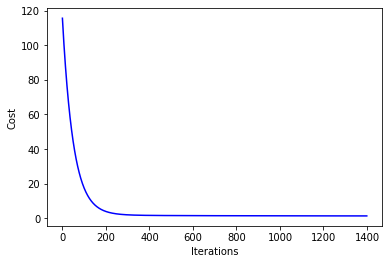

In [21]:
degree= 4
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [22]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2782515284756562


Cost after epoch 1: 0.7632857871359149


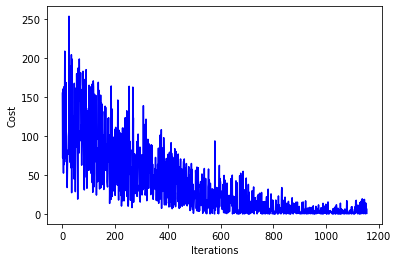

In [23]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [24]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.099734524346724


## Degree: 5

Degree : 5
Cost after iteration 50 : 44.31772140251892
Cost after iteration 100 : 17.45102395108921
Cost after iteration 150 : 7.554017414556035
Cost after iteration 200 : 3.8775181650050774
Cost after iteration 250 : 2.48630717921775
Cost after iteration 300 : 1.938835898459323
Cost after iteration 350 : 1.7063091173892393
Cost after iteration 400 : 1.5941536336857787
Cost after iteration 450 : 1.5302834416979598
Cost after iteration 500 : 1.4875888481998762
Cost after iteration 550 : 1.4555463297062747
Cost after iteration 600 : 1.4298074152061895
Cost after iteration 650 : 1.4083704273259152
Cost after iteration 700 : 1.3901643043040512
Cost after iteration 750 : 1.3745177532447597
Cost after iteration 800 : 1.3609545891384178
Cost after iteration 850 : 1.349110264474743
Cost after iteration 900 : 1.3386942546162757
Cost after iteration 950 : 1.329470466559813
Cost after iteration 1000 : 1.3212452677407582
Cost after iteration 1050 : 1.3138591477494088
Cost after iteration 1100 : 1.

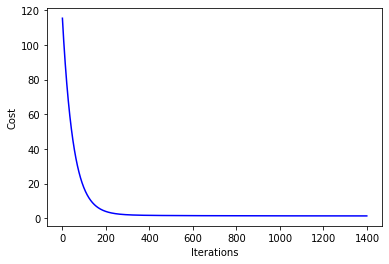

In [25]:
degree= 5
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [26]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2740963043080673


Cost after epoch 1: 0.01961666398096578


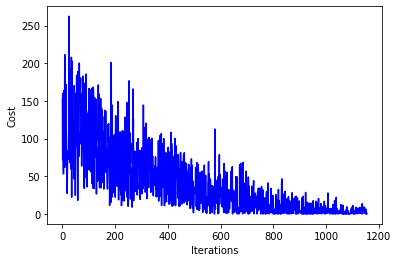

In [27]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.0009, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [28]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 2.6709603208221417


## Degree: 6

Degree : 6
Cost after iteration 50 : 44.13246617654007
Cost after iteration 100 : 17.382150671359195
Cost after iteration 150 : 7.547681430883793
Cost after iteration 200 : 3.884849553758662
Cost after iteration 250 : 2.4887127929432835
Cost after iteration 300 : 1.933344885405102
Cost after iteration 350 : 1.6952309576464444
Cost after iteration 400 : 1.5806065529060296
Cost after iteration 450 : 1.5167390438119412
Cost after iteration 500 : 1.475619992855572
Cost after iteration 550 : 1.4459643447083312
Cost after iteration 600 : 1.4228774692658464
Cost after iteration 650 : 1.404003729392195
Cost after iteration 700 : 1.388064095983215
Cost after iteration 750 : 1.3742818298119728
Cost after iteration 800 : 1.362143535273187
Cost after iteration 850 : 1.3512906109935254
Cost after iteration 900 : 1.3414640494918029
Cost after iteration 950 : 1.332472888058765
Cost after iteration 1000 : 1.3241743405257878
Cost after iteration 1050 : 1.31646042132863
Cost after iteration 1100 : 1.309

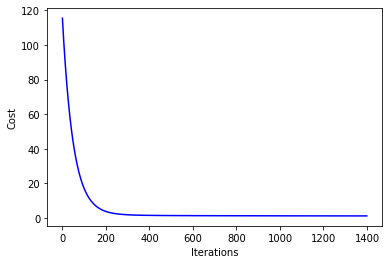

In [29]:
degree= 6
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [30]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2662532183642807


Cost after epoch 1: 1.8796756319328611


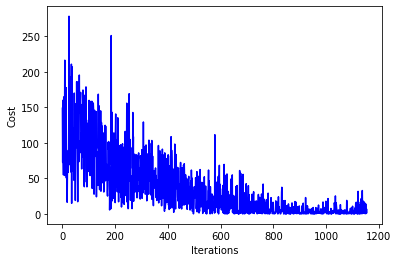

In [31]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [32]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.948955950092389


## Degree: 7

Degree : 7
Cost after iteration 50 : 44.02484524584798
Cost after iteration 100 : 17.360024532551883
Cost after iteration 150 : 7.53917081584531
Cost after iteration 200 : 3.8711169595666086
Cost after iteration 250 : 2.472267147820294
Cost after iteration 300 : 1.9187701387903053
Cost after iteration 350 : 1.68494433955893
Cost after iteration 400 : 1.5750560259866992
Cost after iteration 450 : 1.5152646758270853
Cost after iteration 500 : 1.4771135551250023
Cost after iteration 550 : 1.4492549047148942
Cost after iteration 600 : 1.4269223270023605
Cost after iteration 650 : 1.407962981390152
Cost after iteration 700 : 1.391312224755747
Cost after iteration 750 : 1.3763886935959944
Cost after iteration 800 : 1.3628431403570553
Cost after iteration 850 : 1.3504474839656873
Cost after iteration 900 : 1.3390420182871348
Cost after iteration 950 : 1.3285082642903476
Cost after iteration 1000 : 1.3187539864115332
Cost after iteration 1050 : 1.3097044342708408
Cost after iteration 1100 : 1.

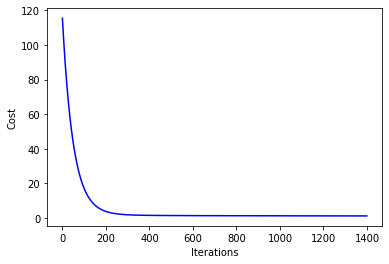

In [33]:
degree= 7
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [34]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2495119768888407


Cost after epoch 1: 2.066490157183527


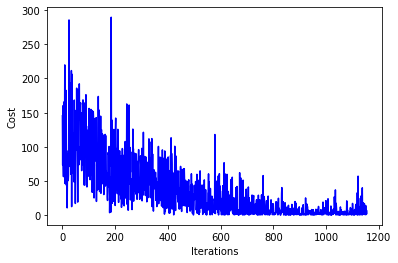

In [35]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [36]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.854528170435385


## Degree: 8

Degree : 8
Cost after iteration 50 : 43.9676470330842
Cost after iteration 100 : 17.342222960642186
Cost after iteration 150 : 7.519412687412444
Cost after iteration 200 : 3.8539220496443463
Cost after iteration 250 : 2.4621189850628062
Cost after iteration 300 : 1.9155307267154522
Cost after iteration 350 : 1.6864270947100617
Cost after iteration 400 : 1.5788325036588062
Cost after iteration 450 : 1.5193922983590755
Cost after iteration 500 : 1.480292536678716
Cost after iteration 550 : 1.4507538058725884
Cost after iteration 600 : 1.4264376816292892
Cost after iteration 650 : 1.405482078221184
Cost after iteration 700 : 1.3870021801740449
Cost after iteration 750 : 1.370515131573824
Cost after iteration 800 : 1.3557144291553083
Cost after iteration 850 : 1.3423786469026808
Cost after iteration 900 : 1.3303328134949872
Cost after iteration 950 : 1.3194310007122072
Cost after iteration 1000 : 1.3095477729746532
Cost after iteration 1050 : 1.3005735175725763
Cost after iteration 1100 : 

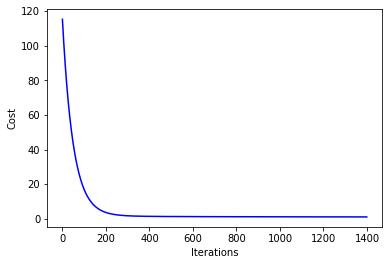

In [37]:
degree= 8
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [38]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2401076479317756


Cost after epoch 1: 2.013524736343837


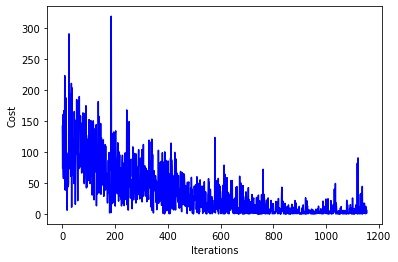

In [39]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [40]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.707359184906692


## Degree: 9

Degree : 9
Cost after iteration 50 : 106.2764263296914
Cost after iteration 100 : 96.18225924310951
Cost after iteration 150 : 87.104903417819
Cost after iteration 200 : 78.92884665141399
Cost after iteration 250 : 71.55679119303232
Cost after iteration 300 : 64.9040760334088
Cost after iteration 350 : 58.89648472782828
Cost after iteration 400 : 53.46855890551395
Cost after iteration 450 : 48.562272721961826
Cost after iteration 500 : 44.1259758715862
Cost after iteration 550 : 40.113538415917674
Cost after iteration 600 : 36.48364894421621
Cost after iteration 650 : 33.199230663068285
Cost after iteration 700 : 30.226949398675323
Cost after iteration 750 : 27.536794249290203
Cost after iteration 800 : 25.101716499340622
Cost after iteration 850 : 22.897315937729886
Cost after iteration 900 : 20.90156629267882
Cost after iteration 950 : 19.094573376462318
Cost after iteration 1000 : 17.458360919525784
Cost after iteration 1050 : 15.976680103166707
Cost after iteration 1100 : 14.634839

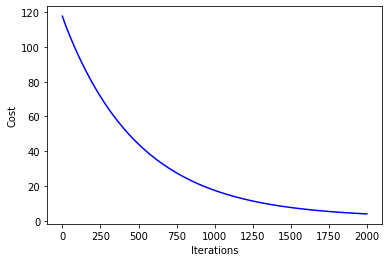

In [41]:
degree=9
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.001, epochs=2000, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)

In [42]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 3.827988725595759


Cost after epoch 1: 1.8467599026508037


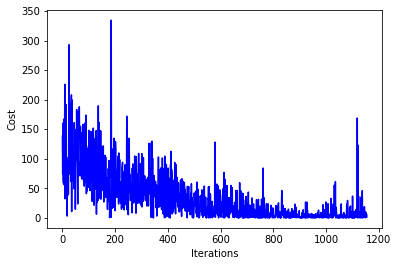

In [43]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [44]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.6571968416370035


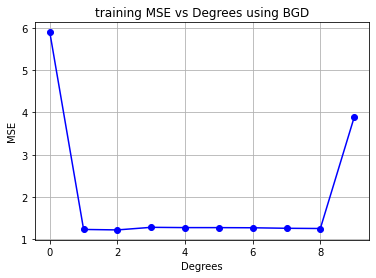

In [45]:
MSE_degree_plot(BGD_MSE_train, 'training', 'BGD')

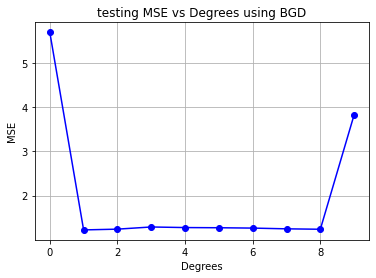

In [46]:
MSE_degree_plot(BGD_MSE_test, 'testing', 'BGD')

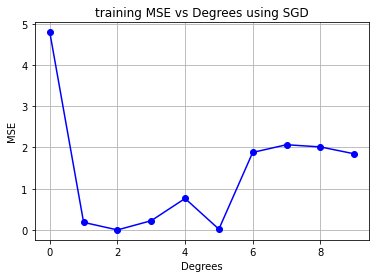

In [47]:
MSE_degree_plot(SGD_MSE_train, 'training', 'SGD')

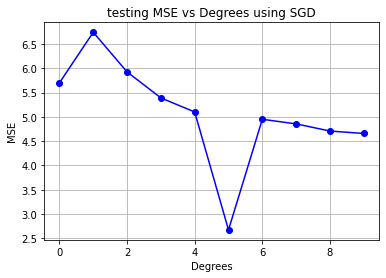

In [48]:
MSE_degree_plot(SGD_MSE_test, 'testing', 'SGD')

# Regularization

# L1 : Lasso Regularization

Degree : 9
Cost after iteration 50 : 107.14562145151011
Cost after iteration 100 : 97.45985411539627
Cost after iteration 150 : 88.70554291795503
Cost after iteration 200 : 80.7888480134129
Cost after iteration 250 : 73.62711953840856
Cost after iteration 300 : 67.14854613299407
Cost after iteration 350 : 61.28699224791798
Cost after iteration 400 : 55.98567296081053
Cost after iteration 450 : 51.18659377233481
Cost after iteration 500 : 46.84600573492976
Cost after iteration 550 : 42.918746717882314
Cost after iteration 600 : 39.36530364523777
Cost after iteration 650 : 36.148573327524666
Cost after iteration 700 : 33.241892838837074
Cost after iteration 750 : 30.610688803708165
Cost after iteration 800 : 28.22888372293394
Cost after iteration 850 : 26.07597393722581
Cost after iteration 900 : 24.128622260207102
Cost after iteration 950 : 22.363981374634953
Cost after iteration 1000 : 20.770132624032147
Cost after iteration 1050 : 19.325971819734633
Cost after iteration 1100 : 18.0196

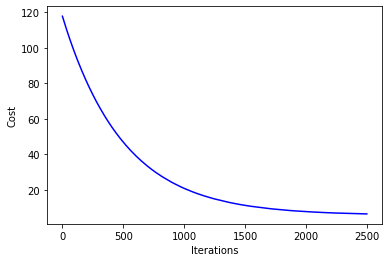

In [49]:
degree = 9
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.001, epochs=2500, GD='BatchGD', regularizer='L1', gamma=0.8)
pr.train(X_train, y_train)

In [50]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data : {test_mse}")

Error on testing data : 6.268719408077034


Cost after epoch 1: 40.833757978984366
Cost after epoch 2: 1.4785932015959926


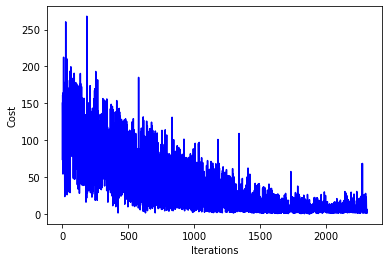

In [51]:
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.0005, epochs=2, GD='StochasticGD', regularizer='L1', gamma=0.8)
pr.train(X_train, y_train)

In [52]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data: {test_mse}")

Error on testing data: 8.32081617765393


## L2 : Ridge Regression

Degree : 9
Cost after iteration 50 : 106.3077717228611
Cost after iteration 100 : 96.26822971172277
Cost after iteration 150 : 87.25930858948817
Cost after iteration 200 : 79.15659957149744
Cost after iteration 250 : 71.85798125988906
Cost after iteration 300 : 65.27643566325898
Cost after iteration 350 : 59.33674421809277
Cost after iteration 400 : 53.97315612731619
Cost after iteration 450 : 49.127698574338496
Cost after iteration 500 : 44.74892104685877
Cost after iteration 550 : 40.79093714910383
Cost after iteration 600 : 37.21267361640848
Cost after iteration 650 : 33.9772664984834
Cost after iteration 700 : 31.051564268302002
Cost after iteration 750 : 28.40571059446677
Cost after iteration 800 : 26.012788059793788
Cost after iteration 850 : 23.84850976072506
Cost after iteration 900 : 21.890949484485002
Cost after iteration 950 : 20.1203036864986
Cost after iteration 1000 : 18.51868020451132
Cost after iteration 1050 : 17.069909825050605
Cost after iteration 1100 : 15.759377643

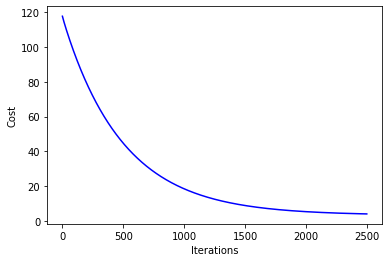

In [53]:
degree = 9
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.001, epochs=2500, GD='BatchGD', regularizer='L2', gamma=0.9)
pr.train(X_train, y_train)

In [54]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data: {test_mse}")

Error on testing data: 3.9776006154887904


Cost after epoch 1: 27.92393709105224
Cost after epoch 2: 1.6490279450544247


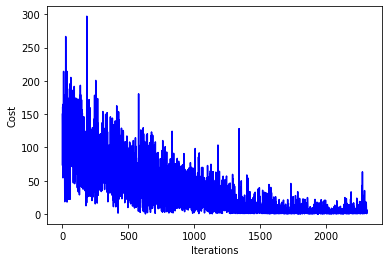

In [55]:
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.0005, epochs=2, GD='StochasticGD', regularizer='L2', gamma=0.89)
pr.train(X_train, y_train)

In [56]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data: {test_mse}")

Error on testing data: 5.978692693133601


Cost after iteration 50 : 106.27678353390863
Cost after iteration 100 : 96.18326538229121
Cost after iteration 150 : 87.10675774214842
Cost after iteration 200 : 78.93164925297246
Cost after iteration 250 : 71.56058367433432
Cost after iteration 300 : 64.9088680951211
Cost after iteration 350 : 58.90226984068998
Cost after iteration 400 : 53.47532320205391
Cost after iteration 450 : 48.569999775744975
Cost after iteration 500 : 44.13464904913604
Cost after iteration 550 : 40.12314184969662
Cost after iteration 600 : 36.494167766326534
Cost after iteration 650 : 33.2106508799362
Cost after iteration 700 : 30.239257624647053
Cost after iteration 750 : 27.549977417292553
Cost after iteration 800 : 25.115761606882515
Cost after iteration 850 : 22.91220985176534
Cost after iteration 900 : 20.917295617655714
Cost after iteration 950 : 19.111124380115946
Cost after iteration 1000 : 17.47571950676174
Cost after iteration 1050 : 15.994831827292193
Cost after iteration 1100 : 14.653769673191324


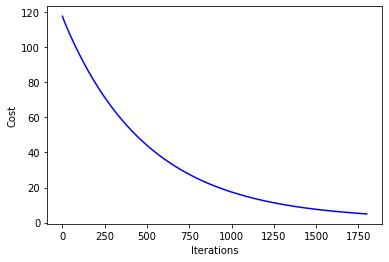

Cost after iteration 50 : 106.28176297965715
Cost after iteration 100 : 96.19722694210968
Cost after iteration 150 : 87.13237352102831
Cost after iteration 200 : 78.9701984267605
Cost after iteration 250 : 71.61253388646925
Cost after iteration 300 : 64.97425073296233
Cost after iteration 350 : 58.98089875757882
Cost after iteration 400 : 53.566917288370604
Cost after iteration 450 : 48.674247906317454
Cost after iteration 500 : 44.25124146799668
Cost after iteration 550 : 40.25178277864646
Cost after iteration 600 : 36.634578137804915
Cost after iteration 650 : 33.36256640406013
Cost after iteration 700 : 30.40242512096384
Cost after iteration 750 : 27.724150961392194
Cost after iteration 800 : 25.30069922773801
Cost after iteration 850 : 23.107671052910934
Cost after iteration 900 : 21.123039746896414
Cost after iteration 950 : 19.32690975161719
Cost after iteration 1000 : 17.701303131925673
Cost after iteration 1050 : 16.229969603528037
Cost after iteration 1100 : 14.89821689255577


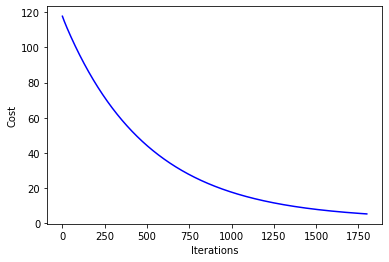

Cost after iteration 50 : 106.28915781468615
Cost after iteration 100 : 96.21774122535342
Cost after iteration 150 : 87.16962077202594
Cost after iteration 200 : 79.02569624721359
Cost after iteration 250 : 71.68661638215237
Cost after iteration 300 : 65.06664036528217
Cost after iteration 350 : 59.091030818754184
Cost after iteration 400 : 53.694116356705415
Cost after iteration 450 : 48.81781803170273
Cost after iteration 500 : 44.41050764481814
Cost after iteration 550 : 40.42610613612531
Cost after iteration 600 : 36.823357927941075
Cost after iteration 650 : 33.56523616891064
Cost after iteration 700 : 30.618447009633563
Cost after iteration 750 : 27.95301017265159
Cost after iteration 800 : 25.54189942563554
Cost after iteration 850 : 23.360730994272725
Cost after iteration 900 : 21.387491056402755
Cost after iteration 950 : 19.602295650541553
Cost after iteration 1000 : 17.98717789123483
Cost after iteration 1050 : 16.525898504051394
Cost after iteration 1100 : 15.20377650754305

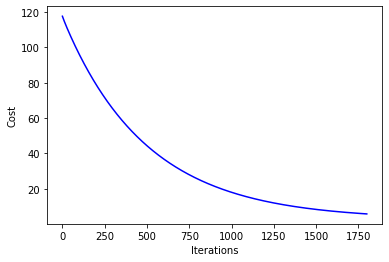

Cost after iteration 50 : 106.29229999637951
Cost after iteration 100 : 96.22637903919342
Cost after iteration 150 : 87.18516496072974
Cost after iteration 200 : 79.04866105913254
Cost after iteration 250 : 71.71702451230678
Cost after iteration 300 : 65.10427047462161
Cost after iteration 350 : 59.13555467941654
Cost after iteration 400 : 53.745171399952234
Cost after iteration 450 : 48.875043136411946
Cost after iteration 500 : 44.473558721883876
Cost after iteration 550 : 40.494661157181994
Cost after iteration 600 : 36.89711687283341
Cost after iteration 650 : 33.643918883785105
Cost after iteration 700 : 30.70179052111219
Cost after iteration 750 : 28.040766183853698
Cost after iteration 800 : 25.633832273195523
Cost after iteration 850 : 23.45661611641804
Cost after iteration 900 : 21.487113916404443
Cost after iteration 950 : 19.705451021273962
Cost after iteration 1000 : 18.093669402387103
Cost after iteration 1050 : 16.635538365094714
Cost after iteration 1100 : 15.31638533671

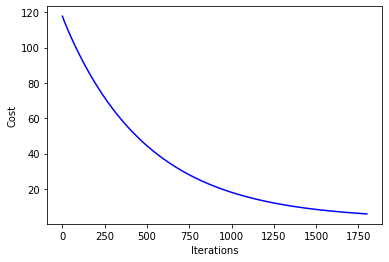

Cost after iteration 50 : 106.29646458148035
Cost after iteration 100 : 96.23775518142963
Cost after iteration 150 : 87.20551097151062
Cost after iteration 200 : 79.07854491862909
Cost after iteration 250 : 71.75637586071437
Cost after iteration 300 : 65.1527121110459
Cost after iteration 350 : 59.19258307771739
Cost after iteration 400 : 53.81025022808034
Cost after iteration 450 : 48.94764810041097
Cost after iteration 500 : 44.55319616650671
Cost after iteration 550 : 40.58087327312291
Cost after iteration 600 : 36.98948066182572
Cost after iteration 650 : 33.742042701621635
Cost after iteration 700 : 30.805310114851984
Cost after iteration 750 : 28.149341084388116
Cost after iteration 800 : 25.74714284503453
Cost after iteration 850 : 23.574361290194872
Cost after iteration 900 : 21.609009509624876
Cost after iteration 950 : 19.831228515330316
Cost after iteration 1000 : 18.223075046648358
Cost after iteration 1050 : 16.768332498694505
Cost after iteration 1100 : 15.452341843245938

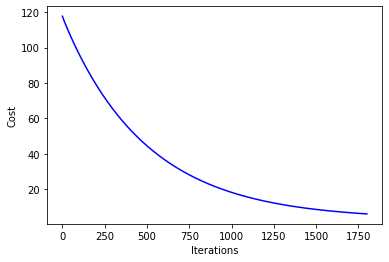

Cost after iteration 50 : 106.30060081991681
Cost after iteration 100 : 96.24897271847391
Cost after iteration 150 : 87.22543312176279
Cost after iteration 200 : 79.10761310824337
Cost after iteration 250 : 71.79441453312782
Cost after iteration 300 : 65.19926115902302
Cost after iteration 350 : 59.2470751710838
Cost after iteration 400 : 53.87210035589095
Cost after iteration 450 : 49.016294949627955
Cost after iteration 500 : 44.62811811467574
Cost after iteration 550 : 40.66159178732183
Cost after iteration 600 : 37.07555806528364
Cost after iteration 650 : 33.83307792824012
Cost after iteration 700 : 30.900934204529918
Cost after iteration 750 : 28.24921316385818
Cost after iteration 800 : 25.85094682170496
Cost after iteration 850 : 23.681803242518335
Cost after iteration 900 : 21.7198156600428
Cost after iteration 950 : 19.94514364858975
Cost after iteration 1000 : 18.33986124717651
Cost after iteration 1050 : 16.887768104378914
Cost after iteration 1100 : 15.574220538696819
Cost

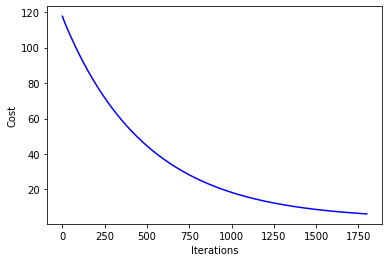

Cost after iteration 50 : 106.30368453552326
Cost after iteration 100 : 96.25728338328405
Cost after iteration 150 : 87.24010294300106
Cost after iteration 200 : 79.12889507868543
Cost after iteration 250 : 71.82211398153214
Cost after iteration 300 : 65.23298518666928
Cost after iteration 350 : 59.286363223961416
Cost after iteration 400 : 53.9164885756434
Cost after iteration 450 : 49.0653448216935
Cost after iteration 500 : 44.681426681427276
Cost after iteration 550 : 40.71879295629613
Cost after iteration 600 : 37.1363200961556
Cost after iteration 650 : 33.8970996787183
Cost after iteration 700 : 30.967941343675108
Cost after iteration 750 : 28.318954837956074
Cost after iteration 800 : 25.923192897770342
Cost after iteration 850 : 23.756342092110597
Cost after iteration 900 : 21.796452386720905
Cost after iteration 950 : 20.023698653239958
Cost after iteration 1000 : 18.4201690380803
Cost after iteration 1050 : 16.969676278544235
Cost after iteration 1100 : 15.657588880623663
Co

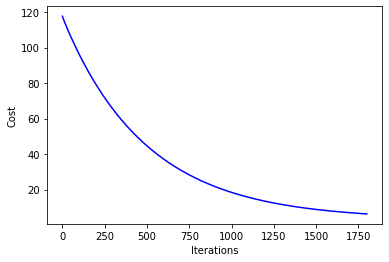

Cost after iteration 50 : 106.30675253319596
Cost after iteration 100 : 96.2655074256346
Cost after iteration 150 : 87.25454464350828
Cost after iteration 200 : 79.14974420529067
Cost after iteration 250 : 71.84912626627224
Cost after iteration 300 : 65.26573146727641
Cost after iteration 350 : 59.32435768584973
Cost after iteration 400 : 53.959250553332474
Cost after iteration 450 : 49.112425323099906
Cost after iteration 500 : 44.73241702815617
Cost after iteration 550 : 40.773324995122714
Cost after iteration 600 : 37.19406293812056
Cost after iteration 650 : 33.95775542752253
Cost after iteration 700 : 31.031240931569332
Cost after iteration 750 : 28.384654393335268
Cost after iteration 800 : 25.991070732531387
Cost after iteration 850 : 23.826196251499116
Cost after iteration 900 : 21.86809865607553
Cost after iteration 950 : 20.096968913394996
Cost after iteration 1000 : 18.49490987710383
Cost after iteration 1050 : 17.04574778841415
Cost after iteration 1100 : 15.734863587194788

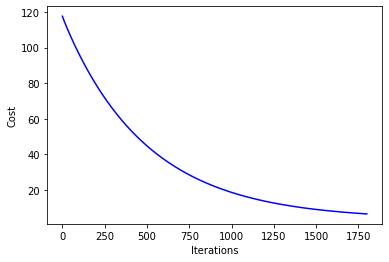

Cost after iteration 50 : 106.31081891284728
Cost after iteration 100 : 96.27633994370461
Cost after iteration 150 : 87.27345274507752
Cost after iteration 200 : 79.17688805250087
Cost after iteration 250 : 71.88410944246075
Cost after iteration 300 : 65.30793210088882
Cost after iteration 350 : 59.37309543499035
Cost after iteration 400 : 54.0138648329814
Cost after iteration 450 : 49.17230726074822
Cost after iteration 500 : 44.79701848208699
Cost after iteration 550 : 40.842157095404524
Cost after iteration 600 : 37.26669054689761
Cost after iteration 650 : 34.033790612443525
Cost after iteration 700 : 31.110336803665174
Cost after iteration 750 : 28.466499782721304
Cost after iteration 800 : 26.07538576415876
Cost after iteration 850 : 23.912728715035882
Cost after iteration 900 : 21.956621015653813
Cost after iteration 950 : 20.18727580851818
Cost after iteration 1000 : 18.58681599165707
Cost after iteration 1050 : 17.13908599419805
Cost after iteration 1100 : 15.829483294738163
C

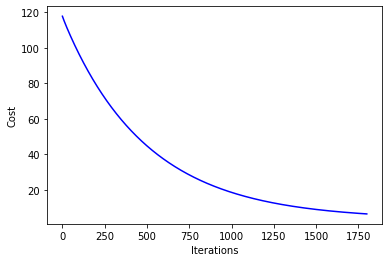

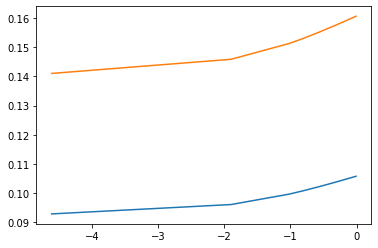

In [59]:
plot_RMSE_loglam(X, y, degree_=9)

# gammas = np.array([0.01, 0.15, 0.36, 0.5, 0.67, 0.75, 0.85, 0.9, 0.99])
# ERMS = []
# ERMS_test = []

# degree=9
# X_new = polynomialFeatures(X, degree=degree)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
# X_train, X_test = standardize(X_train, X_test) 

# for i in range(gammas.size):
#     pr = PolynomialRegression(X_train.shape[0], degree=9, learning_rate=0.001, epochs=1800, regularizer='L2', gamma=gammas[i])
#     pr.train(X_train, y_train, print_cost=False, plot_loss_curves=False)

#     test_mse = pr.evaluate(X_test, y_test)
#     ERMS_test.append(np.sqrt(2 * test_mse / X_test.shape[1]))
#     ERMS.append(np.sqrt(2 * pr.costs[-1] / X_train.shape[1]))

# plt.plot(np.log(gammas), ERMS, c='r')
# plt.plot(np.log(gammas), ERMS_test, c='b')

In [60]:
X = df[['Strength', 'Temperature']]
y = df['Pressure'].to_numpy()
y = y.reshape(-1, 1)
X.shape, y.shape

((1650, 2), (1650, 1))

In [61]:
X = df[['Strength', 'Temperature']]

## Surface plots

In [62]:
def split_df(df):
    df = df.sample(frac=1)
    train_size = int(0.70 * len(df))
    test_size = int(0.30 * len(df))
    
    train_data = df[:train_size]
    test_data = df[-test_size:]
    
    return train_data, test_data

In [63]:
train_data, test_data = split_df(df)

In [64]:
train_data['Strength'] = (train_data['Strength'] - train_data['Strength'].mean())/(train_data['Strength'].std())
train_data['Temperature'] = (train_data['Temperature'] - train_data['Temperature'].mean())/(train_data['Temperature'].std())

In [65]:
x1 = train_data['Strength'].to_numpy()
x2 = train_data['Temperature'].to_numpy()

In [66]:
def surface_plot(train, x1, x2, deg, wt):
    X_train = train.iloc[:, 0:len(train.columns)-1]
    Y_train = train.iloc[:, -1:]
    X_tr = X_train.to_numpy()
    Y_tr = Y_train.to_numpy()
    
    z = X_tr.dot(wt.T)
    
    fig = plt.figure()
    fig.set_size_inches(10, 10)

    my_map = plt.get_cmap('hot')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Degree of polynomial {}'.format(deg), fontsize = 10, color = 'Blue')
    ax.set_xlabel('Strength', color='red', fontsize = 10,y = 5)
    ax.set_ylabel('Temperature', color='Green', fontsize = 10,y = 0)
    ax.set_zlabel('Pressure', color='Purple', fontsize = 10, y = 0)
    
    trisurf = ax.plot_trisurf(x1.flatten(), x2.flatten(), z.flatten(), cmap = my_map, linewidth = 0.2,
                              antialiased = True, edgecolor = 'grey')
    ax.scatter(x1[:70].flatten(), x2[:70].flatten(), Y_tr[:70].flatten(), zdir = 'z', s = 10, c = None, depthshade = True, 
               cmap = my_map)
    plt.show()

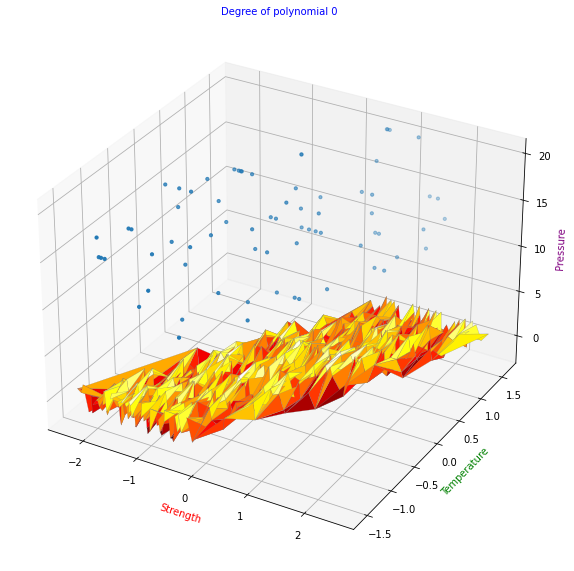

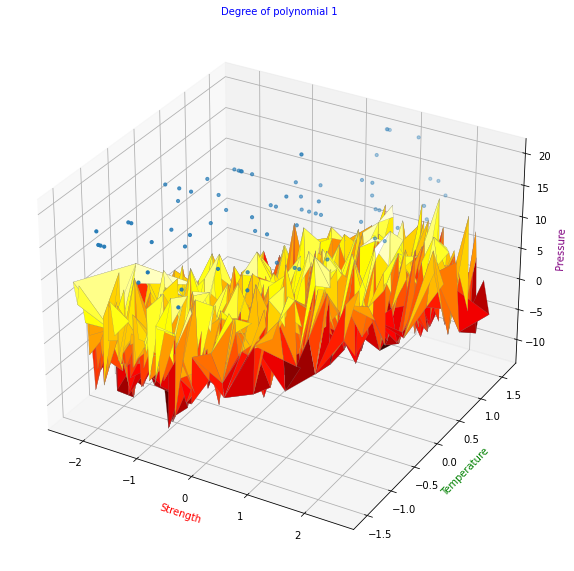

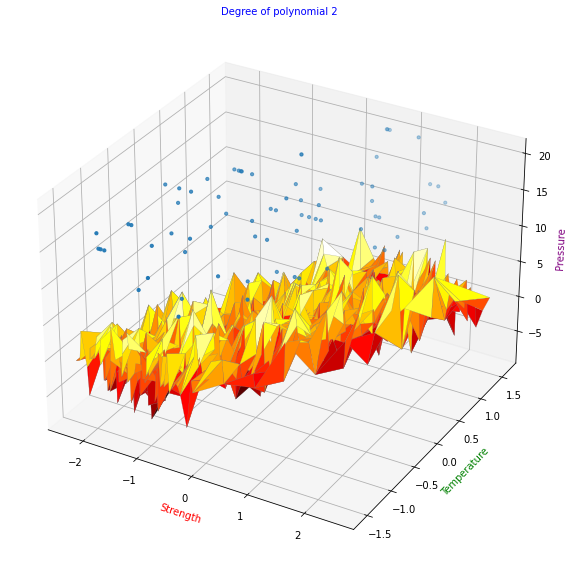

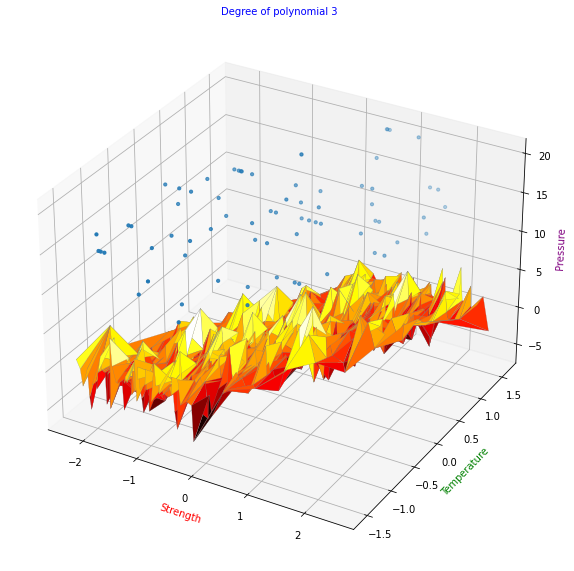

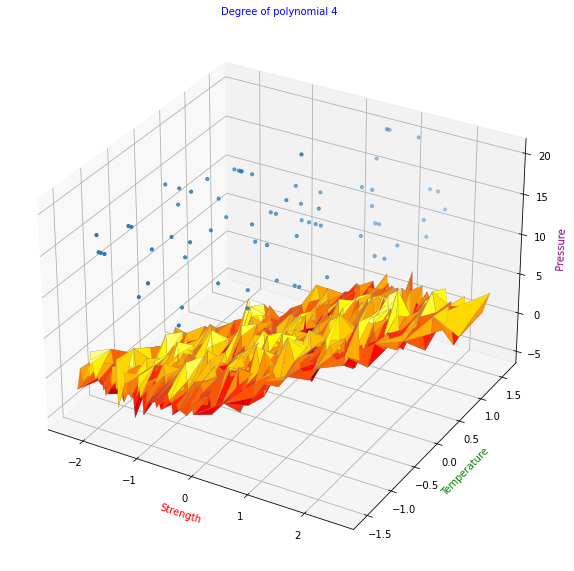

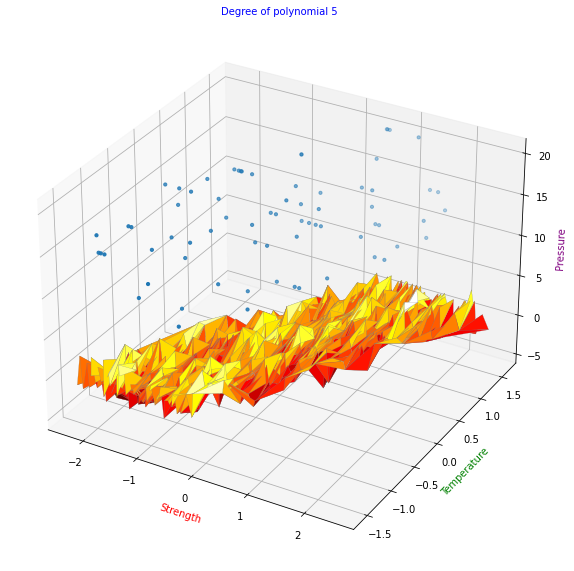

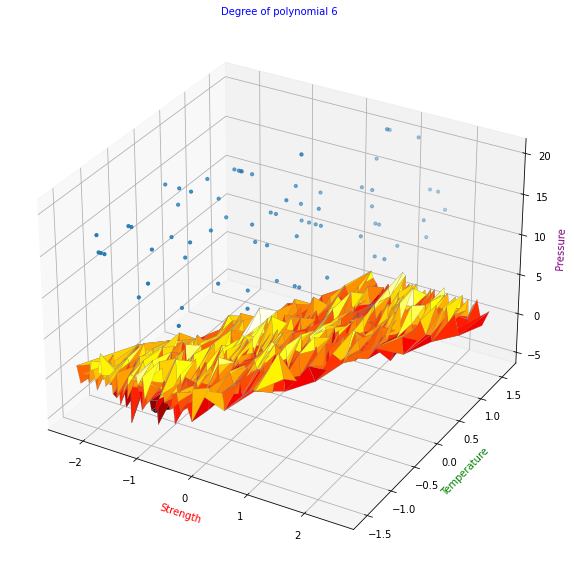

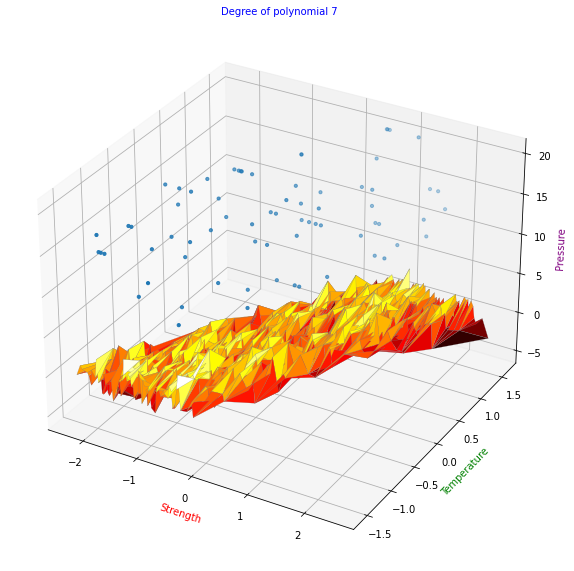

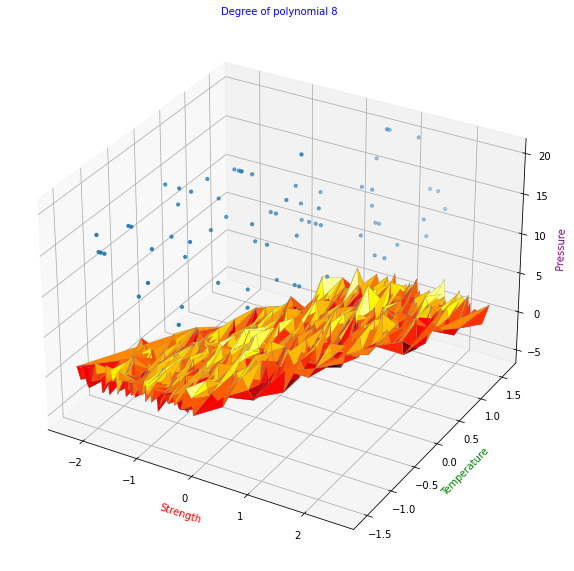

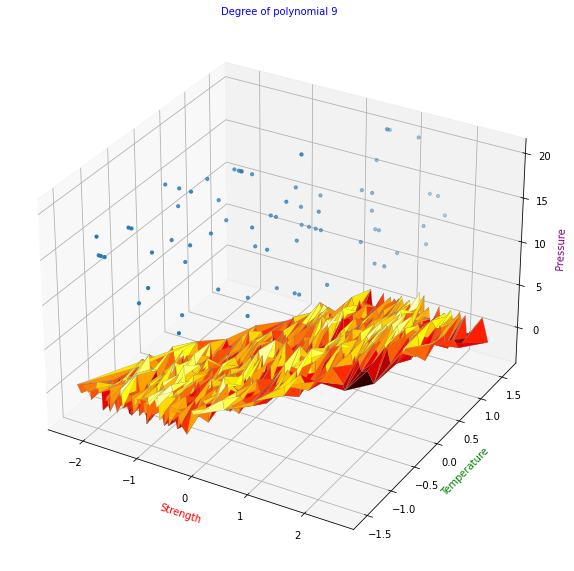

In [67]:
for i in range(0, 10):
    w = np.array(model_wts[i])
    b = np.ones(model_wts[i].shape)
    b = b.reshape(-1, 1)
    wt = np.column_stack((w, b))
    surface_plot(train_data, x1, x2, i, wt)